In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats

### Resources:
- https://hersanyagci.medium.com/detecting-and-handling-outliers-with-pandas-7adbfcd5cad8
- https://www.analyticsvidhya.com/blog/2021/05/detecting-and-treating-outliers-treating-the-odd-one-out/
- https://www.geeksforgeeks.org/detect-and-remove-the-outliers-using-python/
- https://towardsdatascience.com/detecting-and-treating-outliers-in-python-part-1-4ece5098b755
- https://stackoverflow.com/questions/23199796/detect-and-exclude-outliers-in-a-pandas-dataframe

### How outliers impact analysis:
- Impact on Statistics: Outliers can significantly affect basic statistical calculations. For example, they can greatly influence the mean and standard deviation of the data, skewing these metrics away from the central tendency of the majority of data points.
- Influence on Models: Many statistical and machine learning models are sensitive to outliers. For example, linear regression models, which try to find a "best fit" line, can be significantly skewed by outliers. Similarly, models based on distance measures, like K-Nearest Neighbors, or clustering algorithms, can have their results distorted by outliers.
- Generalization and Predictive Performance: Outliers may cause a model to be too complex, focusing on 'extreme' behavior rather than the general trend, leading to overfitting. This would negatively impact the model's ability to generalize and perform well on unseen data.
- Data Quality: Outliers might sometimes indicate errors in data collection or entry. In these cases, it is important to identify and handle them, improving the overall quality of the data.
- Understanding the Data: Lastly, even the process of identifying outliers can be useful, as it requires a deep understanding of the data and can often provide insights about the data or the process that generated it.

### Identifying Outliers:

In [ ]:
from sklearn.datasets import load_diabetes
diabetics = load_diabetes()
column_name = diabetics.feature_names
df_diabetics = pd.DataFrame(diabetics.data, columns = column_name)
print(df_diabetics.shape)
df_diabetics.head()

(442, 10)


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


### Describe Method: To get min, max, mean, 25th and 75th percentile

In [ ]:
df_diabetics.describe().apply(lambda x: x.apply('{0:.5f}'.format)).T

,count,mean,std,min,25%,50%,75%,max
age,442.00000,-0.00000,0.04762,-0.10723,-0.03730,0.00538,0.03808,0.11073
sex,442.00000,0.00000,0.04762,-0.04464,-0.04464,-0.04464,0.05068,0.05068
bmi,442.00000,-0.00000,0.04762,-0.09028,-0.03423,-0.00728,0.03125,0.17056
bp,442.00000,-0.00000,0.04762,-0.11240,-0.03666,-0.00567,0.03564,0.13204
s1,442.00000,-0.00000,0.04762,-0.12678,-0.03425,-0.00432,0.02836,0.15391
s2,442.00000,0.00000,0.04762,-0.11561,-0.03036,-0.00382,0.02984,0.19879
s3,442.00000,-0.00000,0.04762,-0.10231,-0.03512,-0.00658,0.02931,0.18118
s4,442.00000,-0.00000,0.04762,-0.07639,-0.03949,-0.00259,0.03431,0.18523
s5,442.00000,0.00000,0.04762,-0.12610,-0.03325,-0.00195,0.03243,0.13360
s6,442.00000,0.00000,0.04762,-0.13777,-0.03318,-0.00108,0.02792,0.13561


### Tukey's box plot :
- line in the box : median
- edges of the box : 25th and 75th percentile
- whiskers beyond the box : Q1-1.5*IQR and Q3+1.5*IQR
- points beyond the whiskers : outliers

NOTE: In a min-max box plot the whiskers indicate the minimum and maximum points and no outliers are shown

<Axes: >

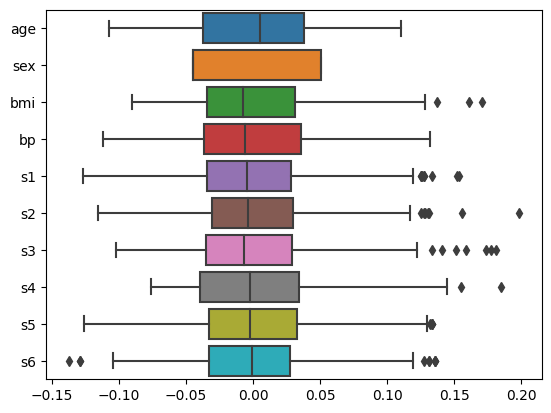

In [ ]:
sns.boxplot(data = df_diabetics, orient = 'h')

### Scatter Plot: To identify bivariate outliers
- Eg: A multivariate outlier could be an observation of a human with a height measurement of 2 meters (in the 95th percentile) and a weight measurement of 50kg (in the 5th percentile)

<Axes: xlabel='bmi', ylabel='bp'>

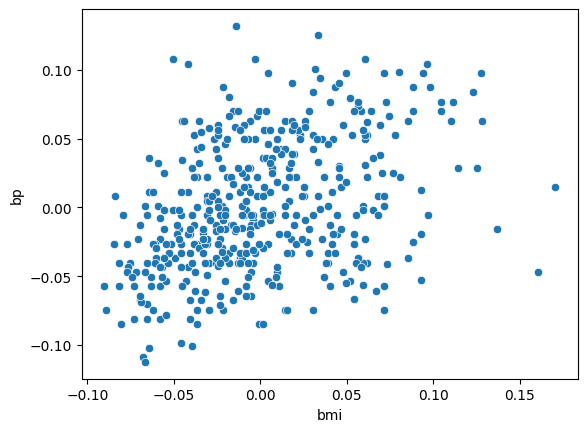

In [ ]:
sns.scatterplot(data = df_diabetics, x ='bmi', y='bp')

<ipython-input-61-4e44107fc78f>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_diabetics['bp'],bins =50, kde = True)


<Axes: xlabel='bp', ylabel='Density'>

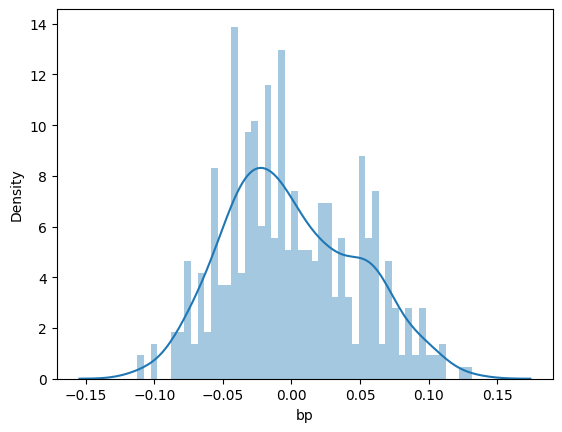

In [ ]:
sns.distplot(df_diabetics['bp'],bins =50, kde = True)

### Ways to treat Outliers:
- Deletion: You can simply remove the outliers from your dataset. This might be reasonable if you believe the outliers are due to errors in data collection or entry. However, it should be used cautiously, as you're essentially throwing away data, which could lead to loss of information.
- Transformation: You can apply a transformation to your data that reduces the impact of the outliers. For example, a logarithmic transformation can reduce the effect of extreme values.
- Capping: You can cap your data at a certain value. For example, you could specify that all values above the 95th percentile will be set to the value at the 95th percentile. This method retains all data points, but limits the influence of extreme values.
- Imputation: You can replace the outliers with statistical measures such as the mean, median, or mode. This might be reasonable if you believe the outliers are due to errors.
- Binning: You can bin the data into categories, which can then be treated as categorical variables. This can limit the influence of outliers by grouping them with other similar data points.
- Separate Treatment: If the outliers could represent a different population or a different phenomenon than the rest of the data, it might be useful to treat them separately in your analysis.
- Robust Methods: You can use statistical techniques or machine learning algorithms that are robust to outliers. For instance, median is a measure of central tendency that is not affected by outliers, unlike mean. Similarly, certain algorithms like Random Forest or SVM can be less sensitive to outliers.
- Use of Confidence Intervals: If the outliers are associated with measurements that are unreliable or uncertain, you can incorporate uncertainty into your data through the use of confidence intervals.

### Tukey's Method:

(439, 10)


<Axes: >

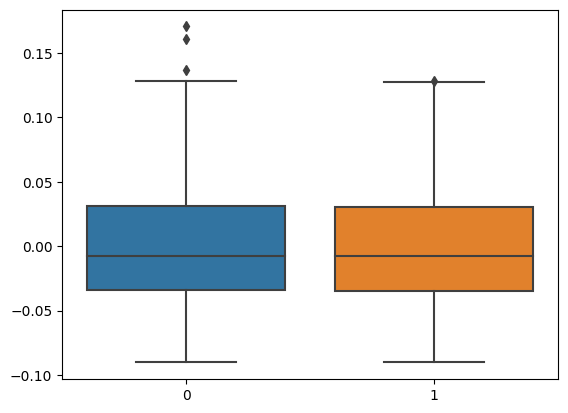

In [ ]:
Q1 = np.percentile(df_diabetics['bmi'], 25)
Q3 = np.percentile(df_diabetics['bmi'], 75)
IQR = Q3-Q1
upper = Q3+1.5*IQR
lower = Q1-1.5*IQR
df_diabetics1 = df_diabetics[(df_diabetics['bmi'] > lower) & (df_diabetics['bmi'] < upper)]
print(df_diabetics1.shape)
sns.boxplot(data = [df_diabetics['bmi'],df_diabetics1['bmi']])

<ipython-input-71-164eb5d22d0d>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_diabetics1[df_diabetics['bmi'] > upper]['bmi'] = upper
<ipython-input-71-164eb5d22d0d>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_diabetics1[df_diabetics['bmi'] > upper]['bmi'] = upper
<ipython-input-71-164eb5d22d0d>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_diabetics1[df_diabetics['bmi'] < lower]['bmi'] = lower
<ipython-input-71-164eb5d22d0d>:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histogr

(421, 10)


<ipython-input-71-164eb5d22d0d>:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_diabetics1['bmi'])


<Axes: xlabel='bmi', ylabel='Density'>

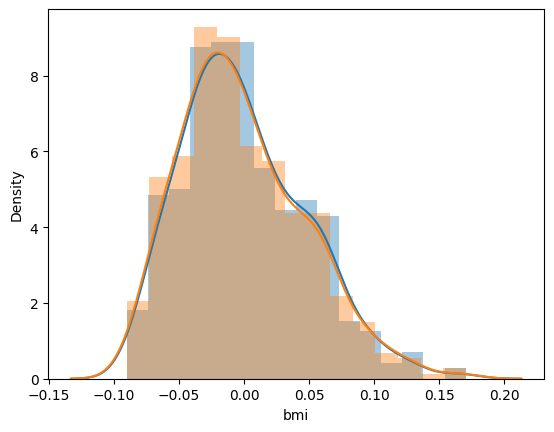

In [ ]:
# Capping instead of deleting values that are considered outliers:
Q1 = np.percentile(df_diabetics['bmi'], 25)
Q3 = np.percentile(df_diabetics['bmi'], 75)
IQR = Q3-Q1
upper = Q3+1.5*IQR
lower = Q1-1.5*IQR

df_diabetics1[df_diabetics['bmi'] > upper]['bmi'] = upper
df_diabetics1[df_diabetics['bmi'] < lower]['bmi'] = lower

print(df_diabetics1.shape)
sns.distplot(df_diabetics['bmi'])
sns.distplot(df_diabetics1['bmi'])
# sns.boxplot(data = [df_diabetics['bmi'],df_diabetics1['bmi']])

### Log IQ Method :
If a distribution is highly skewed (usually found in real-life data), the Tukey method can be extended to the log-IQ method. Here, each value is transformed to its logarithm before calculating the inner and outer fences.

(436, 10)


<Axes: >

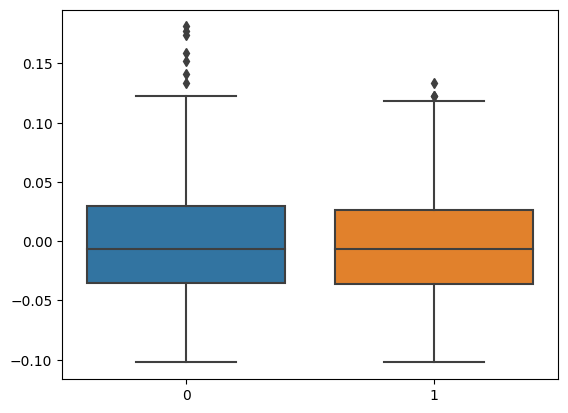

In [ ]:
Q1 = np.percentile(np.log(df_diabetics['s3']+1), 25)
Q3 = np.percentile(np.log(df_diabetics['s3']+1), 75)
IQR = Q3-Q1
upper = Q3+1.5*IQR
lower = Q1-1.5*IQR
df_diabetics1 = df_diabetics[(np.log(df_diabetics['s3']+1) > lower) & (np.log(df_diabetics['s3']+1) < upper)]
print(df_diabetics1.shape)
sns.boxplot(data = [df_diabetics['s3'],df_diabetics1['s3']])

### Internally studentized residuals AKA z-score method:
- For each observation (Xn), it is measured how many standard deviations the data point is away from its mean (X̄).
- Following a common rule of thumb, if z > C, where C is usually set to 3, the observation is marked as an outlier. This rule stems from the fact that if a variable is normally distributed, 99.7% of all data points are located 3 standard deviations around the mean
- this method is highly limited as the distributions mean and standard deviation are sensitive to outliers. This means that finding one outlier is dependent on other outliers as every observation directly affects the mean

(440, 10)


<Axes: >

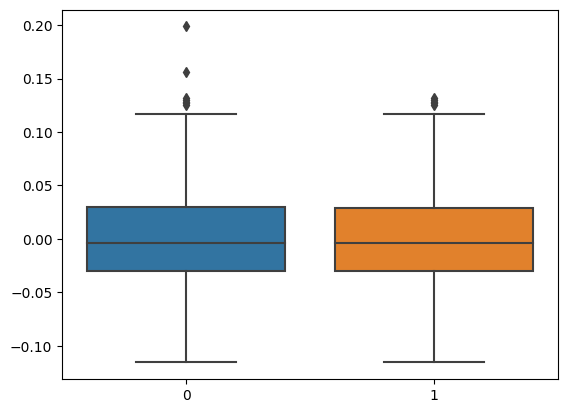

In [ ]:
df_diabetics1 = df_diabetics[np.abs(stats.zscore(df_diabetics['s2'])) <= 3]
print(df_diabetics1.shape)
sns.boxplot(data = [df_diabetics['s2'],df_diabetics1['s2']])

### Median Absolute Deviation from the median (MAD):
- The median absolute deviation method (MAD) replaces the mean and standard deviation with more robust statistics, like the median and median absolute deviation. The median absolute deviation is defined as: MAD = median(|X_i - X_bar|)

(421, 10)


<Axes: >

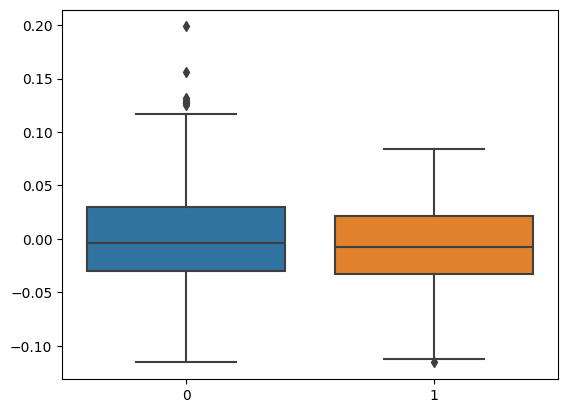

In [ ]:
med = np.median(df_diabetics['s2'])
mad = stats.median_abs_deviation(df_diabetics['s2'])
df_diabetics1 = df_diabetics[((df_diabetics['s2']-med)/mad) <= 3]
print(df_diabetics1.shape)
sns.boxplot(data = [df_diabetics['s2'],df_diabetics1['s2']])

### Winsorize Method:
- In the Winsorize Method, we limit outliers with an upper and lower limit
- We will make our upper and lower limits for data our new maximum and minimum points

(431, 10)


<Axes: >

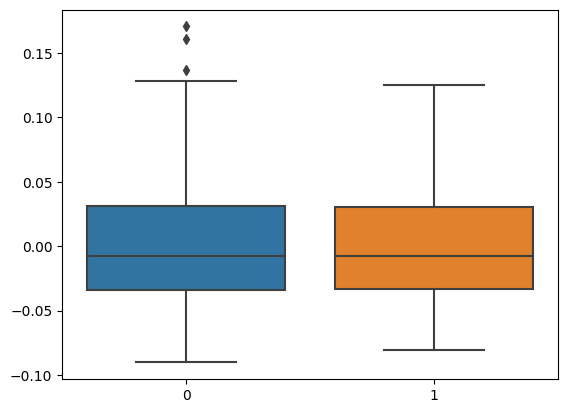

In [ ]:
upper = np.percentile(df_diabetics['bmi'], 99)
lower = np.percentile(df_diabetics['bmi'], 1)
df_diabetics1 = df_diabetics[(df_diabetics['bmi'] > lower) & (df_diabetics['bmi'] < upper)]
print(df_diabetics1.shape)
sns.boxplot(data = [df_diabetics['bmi'],df_diabetics1['bmi']])

In [ ]:
from scipy.stats.mstats import winsorize
df_diabetics1 = winsorize(df_diabetics, (0.01,0.99))
print(df_diabetics1.shape)
#sns.boxplot(data = [df_diabetics['bmi'],df_diabetics1['bmi']])

AttributeError: ignored